In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
def bootstrap(sample,runs):
    ls = []
    n = sample.shape[0]
    for _ in range(runs):
        sum = 0
        for i in range(n):
            r = np.floor(np.random.random()*n)
            sum += sample[r]
        ls.append(sum/n)
    #plt.hist(ls,bins = 100)
    ls.sort()
    return ls
def getbounds(ls,confidence):
    confidence /= 2
    n = len(ls)
    lb = int(np.floor(confidence * n)/100)
    ub = int(np.floor((100-confidence)*n/100))
    return ls[lb],ls[ub]

**A heatmap of the data**

In [4]:
sub = gradAd.drop(['GRE Score','TOEFL Score','CGPA','Research','Chance of Admit '],axis = 1)

In [5]:
sub

,University Rating,SOP,LOR
0,4,4.5,4.5
1,4,4.0,4.5
2,3,3.0,3.5
3,3,3.5,2.5
4,2,2.0,3.0
...,...,...,...
495,5,4.5,4.0
496,5,5.0,5.0
497,5,4.5,5.0
498,4,4.0,5.0


In [6]:
sub = sub.pivot_table(values = 'University Rating',index = 'SOP',columns = 'LOR ')

In [7]:
gradAd['University Rating'][(gradAd['SOP'] == 3.0) & (gradAd['LOR '] == 1.5)].mean()

1.5

In [8]:
sub


LOR,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
SOP,,,,,,,,,
1.0,1.0,1.000000,1.500000,1.000000,NaN,NaN,NaN,NaN,NaN
1.5,NaN,1.000000,1.538462,3.000000,1.500000,1.500000,1.000000,NaN,NaN
2.0,NaN,1.333333,1.666667,2.187500,2.555556,2.250000,2.500000,2.000000,NaN
2.5,NaN,2.250000,2.538462,2.285714,2.263158,1.888889,2.222222,3.000000,NaN
3.0,NaN,1.500000,2.375000,3.000000,2.695652,2.869565,2.444444,3.750000,3.000000
3.5,NaN,NaN,3.333333,3.000000,2.800000,2.875000,3.227273,3.500000,3.400000
4.0,NaN,NaN,2.000000,3.750000,2.800000,3.350000,3.684211,3.857143,4.357143
4.5,NaN,NaN,NaN,NaN,3.666667,3.888889,4.208333,4.166667,4.666667
5.0,NaN,NaN,NaN,NaN,5.000000,4.000000,4.333333,4.666667,4.700000


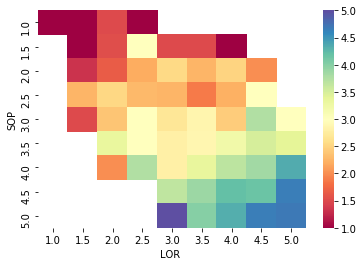

In [9]:
sns.heatmap(data = sub,cmap = "Spectral")

**University rating vs SOP**

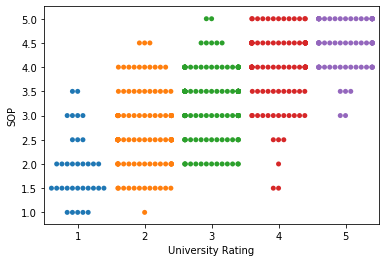

In [10]:
sns.swarmplot(x = 'University Rating',y = 'SOP',data = gradAd)

In [11]:
mid = gradAd['SOP'].groupby(gradAd['University Rating']).mean()
mid.index = range(5)

In [12]:
hb = []
lb = []
for i in range(5):
    temp = gradAd[gradAd['University Rating'] == i+1]
    temp.index = range(temp.shape[0])
    ls = bootstrap(temp['SOP'],5000)
    l,h = getbounds(ls,5)
    lb.append(l)
    hb.append(h)

In [13]:
hb

[2.1911764705882355,
 2.8095238095238093,
 3.4074074074074074,
 4.142857142857143,
 4.595890410958904]

In [14]:
lb

[1.7058823529411764,
 2.5595238095238093,
 3.2098765432098766,
 3.8476190476190477,
 4.3561643835616435]

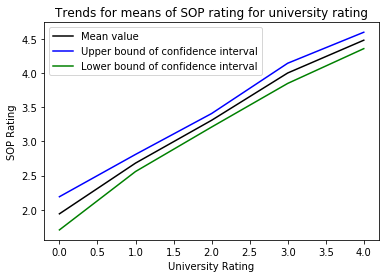

In [15]:
plt.title('Trends for means of SOP rating for university rating')
plt.xlabel('University Rating')
plt.ylabel('SOP Rating')
plt.plot(mid,'black',hb,'blue',lb,'green')
plt.legend(('Mean value','Upper bound of confidence interval','Lower bound of confidence interval'))

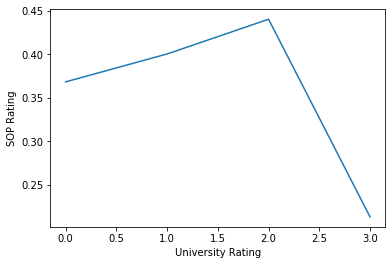

In [16]:
estimate = []
for i in range(4):
    estimate.append(lb[i+1] - hb[i])
plt.xlabel('University Rating')
plt.ylabel('SOP Rating')
plt.plot(estimate)

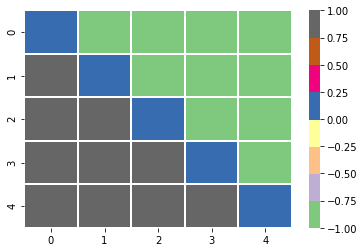

In [27]:
arr = np.zeros((5,5))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if lb[i]>hb[j]:
            arr[i][j] = 1
        elif lb[j]>hb[i]:
            arr[i][j] = -1
        else:
            arr[i][j] = 0
sns.heatmap(data = arr,cmap = "Accent",linewidths = 1)

In [18]:
"""arr = np.zeros((5,5))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        x1 = gradAd['SOP'][gradAd['University Rating']==i+1].mean()
        s1 = gradAd['SOP'][gradAd['University Rating']==i+1].var()
        n1 = gradAd['SOP'][gradAd['University Rating']==i+1].shape[0]
        x2 = gradAd['SOP'][gradAd['University Rating']==j+1].mean()
        s2 = gradAd['SOP'][gradAd['University Rating']==j+1].var()
        n2 = gradAd['SOP'][gradAd['University Rating']==j+1].shape[0]
        den = sqrt(s1/n1+s2/n2)
        df = (var1/n1+var2/n2)**2/((var1/n1)**2/(n1-1)+(var2/n2)**2/(n2-1))"""

"arr = np.zeros((5,5))\nfor i in range(arr.shape[0]):\n    for j in range(arr.shape[1]):\n        x1 = gradAd['SOP'][gradAd['University Rating']==i+1].mean()\n        s1 = gradAd['SOP'][gradAd['University Rating']==i+1].var()\n        n1 = gradAd['SOP'][gradAd['University Rating']==i+1].shape[0]\n        x2 = gradAd['SOP'][gradAd['University Rating']==j+1].mean()\n        s2 = gradAd['SOP'][gradAd['University Rating']==j+1].var()\n        n2 = gradAd['SOP'][gradAd['University Rating']==j+1].shape[0]\n        den = sqrt(s1/n1+s2/n2)\n        df = (var1/n1+var2/n2)**2/((var1/n1)**2/(n1-1)+(var2/n2)**2/(n2-1))"

**University Rating vs LOR**

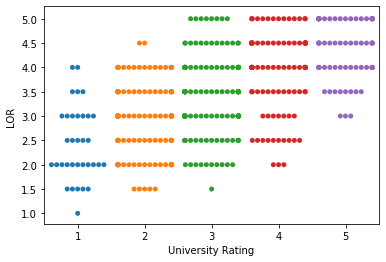

In [19]:
sns.swarmplot(x = 'University Rating',y = 'LOR ',data = gradAd)

In [20]:
mid = gradAd['LOR '].groupby(gradAd['University Rating']).mean()
mid.index = range(5)

In [21]:
hb = []
lb = []
for i in range(5):
    temp = gradAd[gradAd['University Rating'] == i+1]
    temp.index = range(temp.shape[0])
    ls = bootstrap(temp['LOR '],5000)
    l,h = getbounds(ls,5)
    lb.append(l)
    hb.append(h)

In [22]:
hb

[2.6911764705882355,
 3.0833333333333335,
 3.515432098765432,
 4.1,
 4.534246575342466]

In [23]:
lb

[2.176470588235294,
 2.8333333333333335,
 3.2901234567901234,
 3.7904761904761903,
 4.267123287671233]

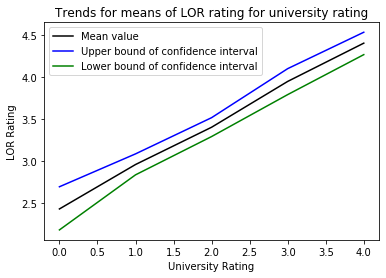

In [24]:
plt.title('Trends for means of LOR rating for university rating')
plt.xlabel('University Rating')
plt.ylabel('LOR Rating')
plt.plot(mid,'black',hb,'blue',lb,'green')
plt.legend(('Mean value','Upper bound of confidence interval','Lower bound of confidence interval'))

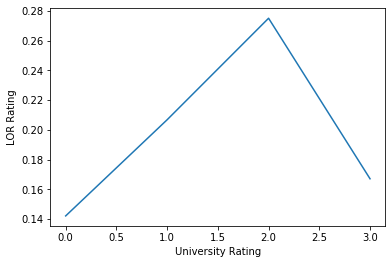

In [25]:
estimate = []
for i in range(4):
    estimate.append(lb[i+1] - hb[i])
plt.xlabel('University Rating')
plt.ylabel('LOR Rating')
plt.plot(estimate)

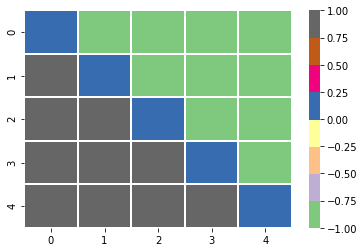

In [28]:
arr = np.zeros((5,5))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if lb[i]>hb[j]:
            arr[i][j] = 1
        elif lb[j]>hb[i]:
            arr[i][j] = -1
        else:
            arr[i][j] = 0
sns.heatmap(data = arr,cmap = "Accent",linewidths = 1)